In [1]:
import numpy as np
import autoencodix as acx
from autoencodix.utils.default_config import DefaultConfig,DataCase
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import ACX_helper as ACXh
import scanpy as sc


C:\Users\vfriedrich\projects\NK_alliance\autoencodix\.autoencodix_env_2\lib\site-packages\anndata\utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
C:\Users\vfriedrich\projects\NK_alliance\autoencodix\.autoencodix_env_2\lib\site-packages\anndata\utils.py:434: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
C:\Users\vfriedrich\projects\NK_alliance\autoencodix\.autoencodix_env_2\lib\site-packages\anndata\utils.py:434: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
C:\Users\vfriedrich\projects\NK_alliance\autoencodix\.autoencodix_env_2\lib\site-packages\anndata\utils.py:434: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
C:

In [2]:
load_path_train = 'C:\\Users\\vfriedrich\\projects\\NK_alliance\\out\\NK03\\adata_train.h5ad'
load_path_test = 'C:\\Users\\vfriedrich\\projects\\NK_alliance\\out\\NK03\\adata_test.h5ad'
adata_train = sc.read_h5ad(load_path_train)
adata_test = sc.read_h5ad(load_path_test)

In [3]:
config = DefaultConfig(data_case=DataCase.MULTI_SINGLE_CELL,skip_preprocessing=True,latent_dim=6)

In [4]:
sc.pp.highly_variable_genes(
    adata_train,
    flavor="seurat_v3",
    n_top_genes=100,
    subset=True
)

In [5]:
pre = 'XAI_06'
save_base_path = 'C:\\Users\\vfriedrich\\projects\\ACX_XAI\\out'

In [8]:
# pd.DataFrame(adata_train.var.index, columns=['HVG']).to_csv(os.path.join(save_base_path,pre + '_df_input_genes_ACX'))

### Varix

In [11]:
varix_model = acx.Varix(user_data=adata_train.copy(),config=config)
out_path_varix = 'C:\\Users\\vfriedrich\\projects\\ACX_XAI\\out\\XAI_06\\Varix'
results_varix = varix_model.run()

datapacke in _split_data_package: multi_sc:
  multi_sc: 5707 samples × 100 features
{5707}
in _split_data_package
key: multi_sc, type: <class 'dict'>
in multi_sc
key: multi_bulk, type: <class 'NoneType'>
key: annotation, type: <class 'NoneType'>
key: img, type: <class 'NoneType'>
key: from_modality, type: <class 'dict'>
in dict case
 attribute name: from_modality
key: to_modality, type: <class 'dict'>
in dict case
 attribute name: to_modality
in _split_data_package
key: multi_sc, type: <class 'dict'>
in multi_sc
key: multi_bulk, type: <class 'NoneType'>
key: annotation, type: <class 'NoneType'>
key: img, type: <class 'NoneType'>
key: from_modality, type: <class 'dict'>
in dict case
 attribute name: from_modality
key: to_modality, type: <class 'dict'>
in dict case
 attribute name: to_modality
in _split_data_package
key: multi_sc, type: <class 'dict'>
in multi_sc
key: multi_bulk, type: <class 'NoneType'>
key: annotation, type: <class 'NoneType'>
key: img, type: <class 'NoneType'>
key: fr

### Vanillix

In [12]:
vanillix_model = acx.Vanillix(user_data=adata_train.copy(),config=config)
out_path_vanillix = 'C:\\Users\\vfriedrich\\projects\\ACX_XAI\\out\\XAI_06\\Vanillix' 
results_vanillix = vanillix_model.run()

datapacke in _split_data_package: multi_sc:
  multi_sc: 5707 samples × 100 features
{5707}
in _split_data_package
key: multi_sc, type: <class 'dict'>
in multi_sc
key: multi_bulk, type: <class 'NoneType'>
key: annotation, type: <class 'NoneType'>
key: img, type: <class 'NoneType'>
key: from_modality, type: <class 'dict'>
in dict case
 attribute name: from_modality
key: to_modality, type: <class 'dict'>
in dict case
 attribute name: to_modality
in _split_data_package
key: multi_sc, type: <class 'dict'>
in multi_sc
key: multi_bulk, type: <class 'NoneType'>
key: annotation, type: <class 'NoneType'>
key: img, type: <class 'NoneType'>
key: from_modality, type: <class 'dict'>
in dict case
 attribute name: from_modality
key: to_modality, type: <class 'dict'>
in dict case
 attribute name: to_modality
in _split_data_package
key: multi_sc, type: <class 'dict'>
in multi_sc
key: multi_bulk, type: <class 'NoneType'>
key: annotation, type: <class 'NoneType'>
key: img, type: <class 'NoneType'>
key: fr

In [18]:
out_path_varix_IG = os.path.join(out_path_varix, 'IG')
out_path_varix_DLS = os.path.join(out_path_varix, 'DLS')
os.mkdir(out_path_varix_IG)
os.mkdir(out_path_varix_DLS)

In [17]:
out_path_vanillix_IG = os.path.join(out_path_vanillix, 'IG')
out_path_vanillix_DLS = os.path.join(out_path_vanillix, 'DLS')
os.mkdir(out_path_vanillix_IG)
os.mkdir(out_path_vanillix_DLS)

### DeepLiftShap

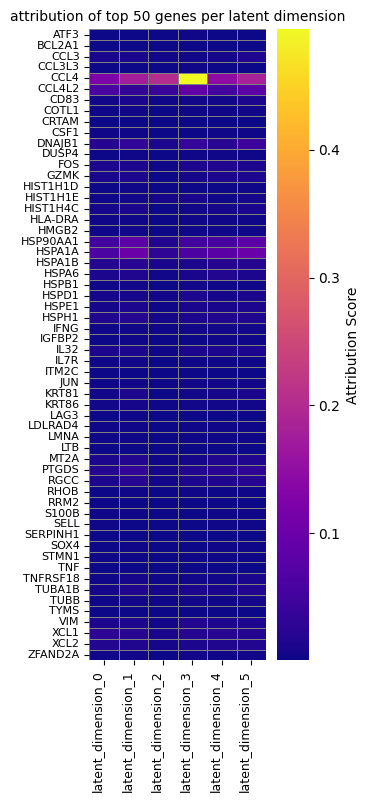

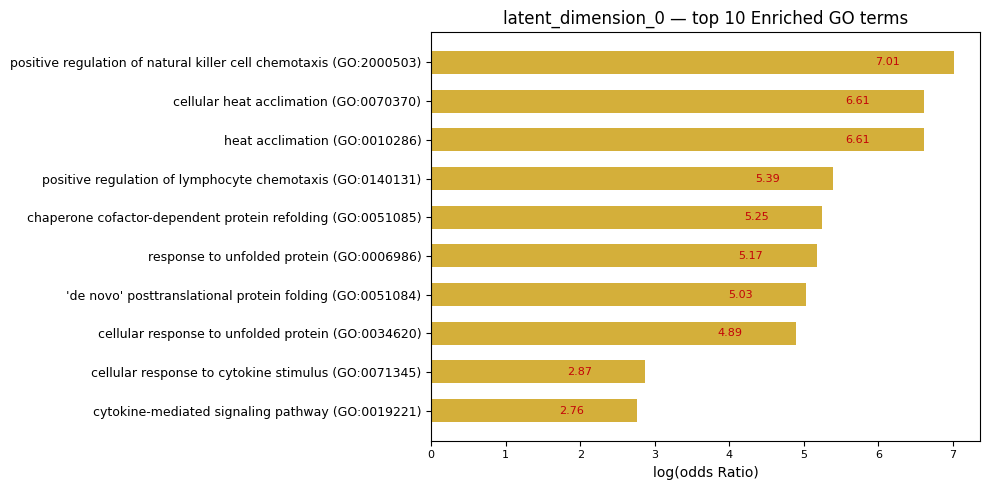

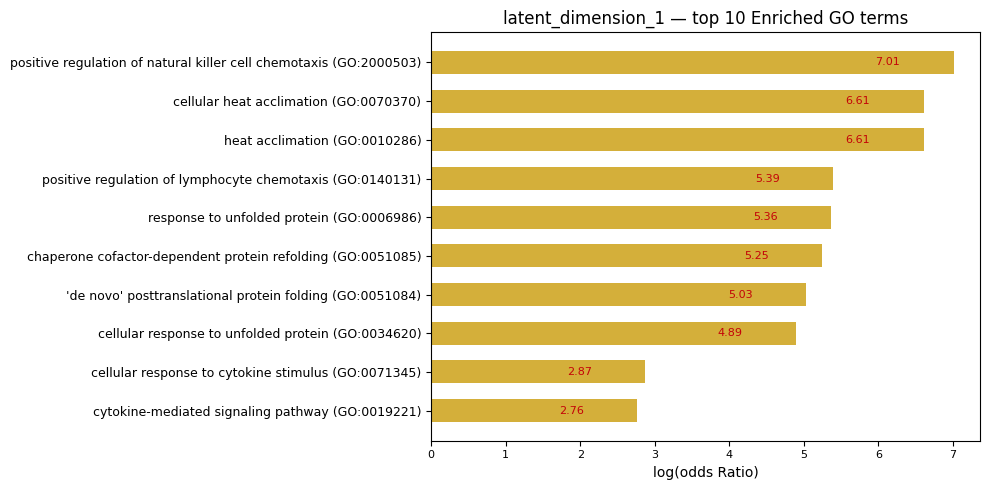

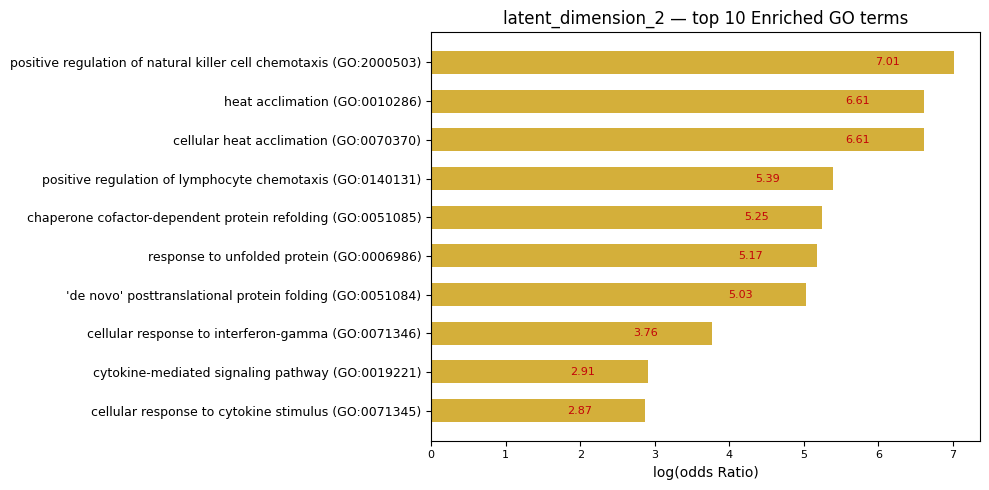

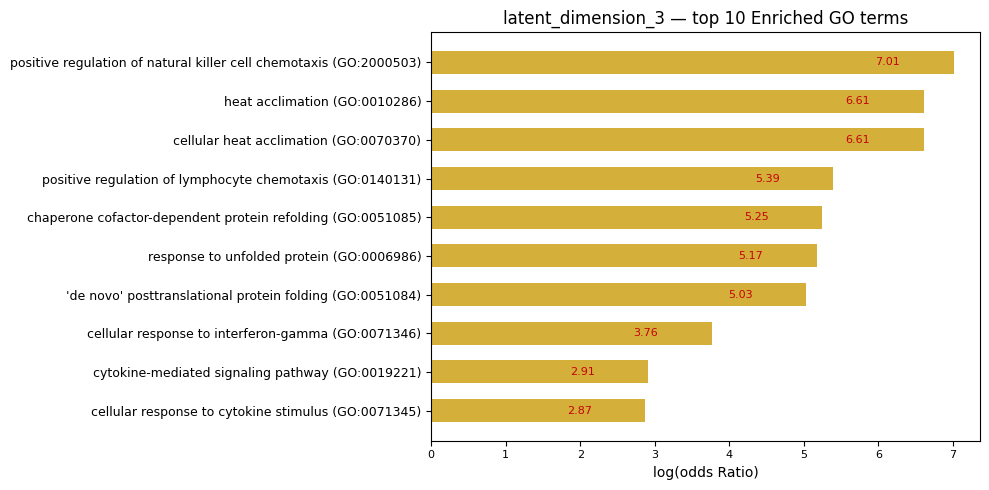

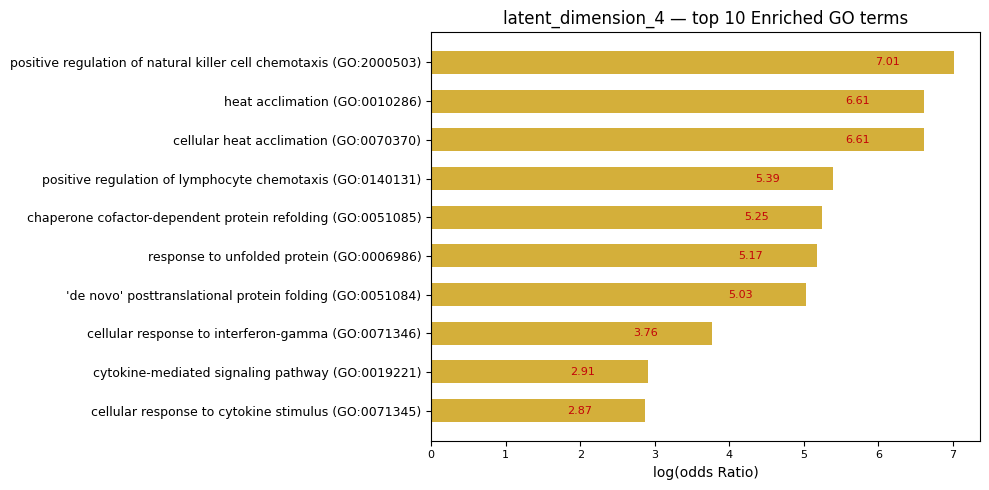

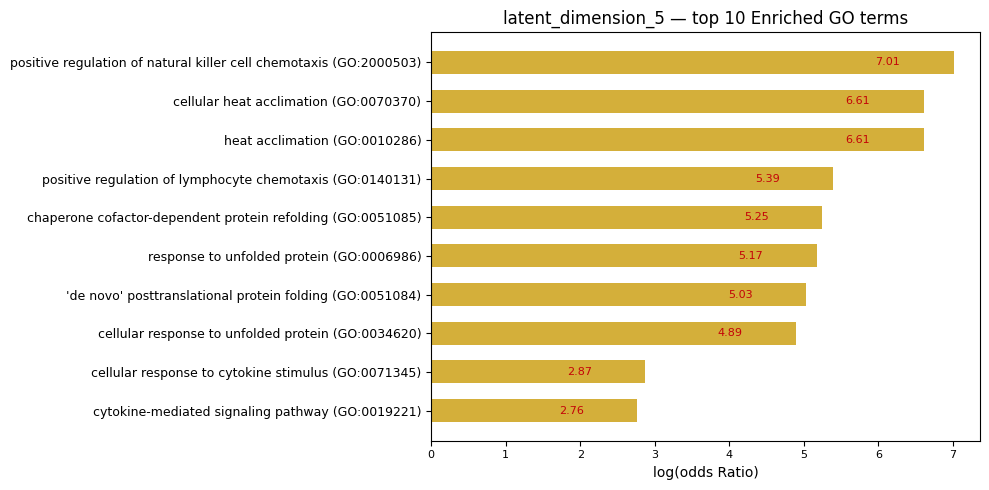

In [19]:
df_attributions_DLS =  ACXh.do_feature_importance_Vanillix(vanillix_model,
                                                method = 'DeepLiftShap',
                                                baseline_type = 'mean',
                                                baseline_group = 'all',
                                                obs_col = None,
                                                seed_int = 25,
                                                do_visualizations=True,                                                                 
                                               save_out_path = out_path_vanillix_DLS)

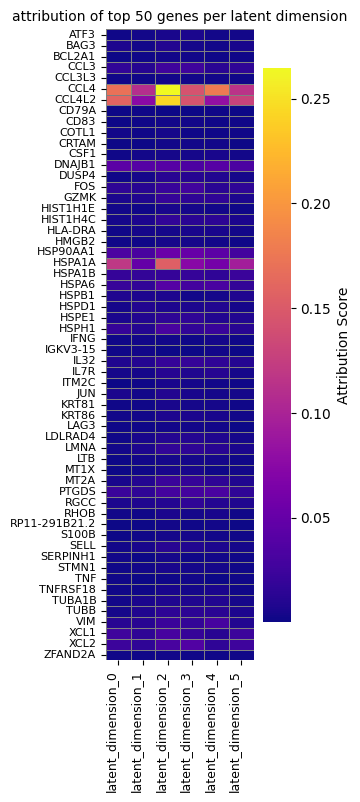

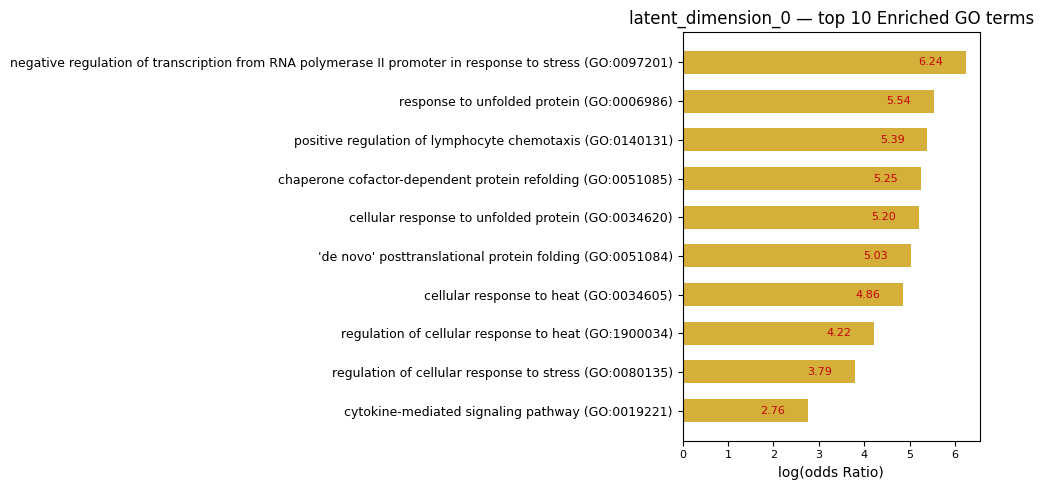

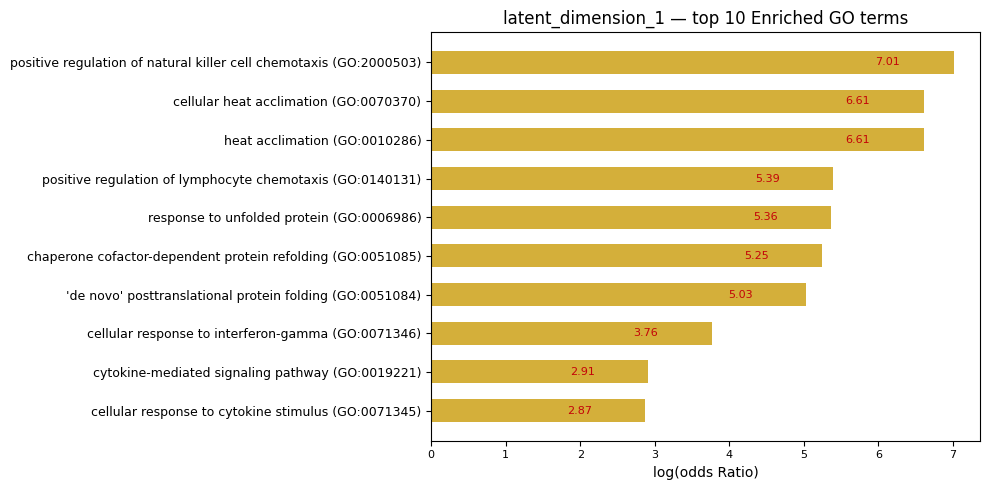

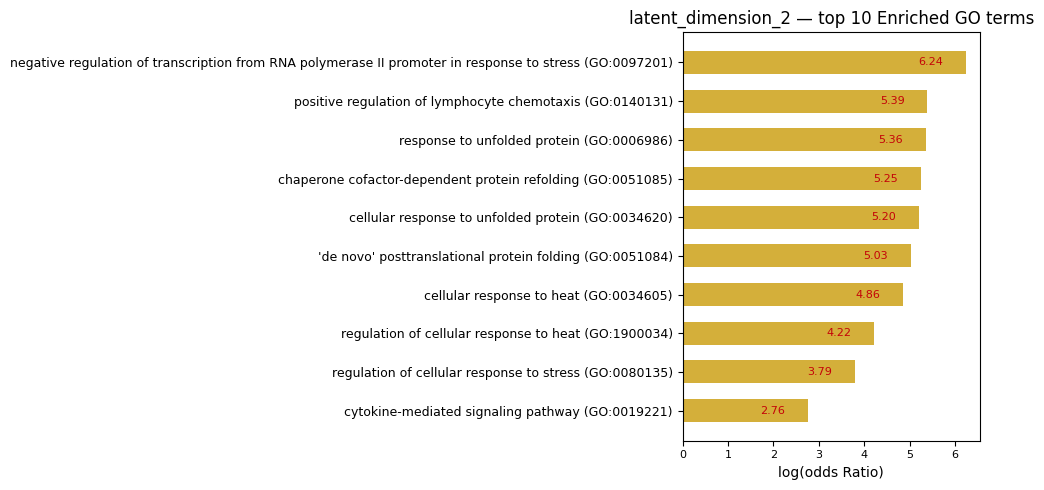

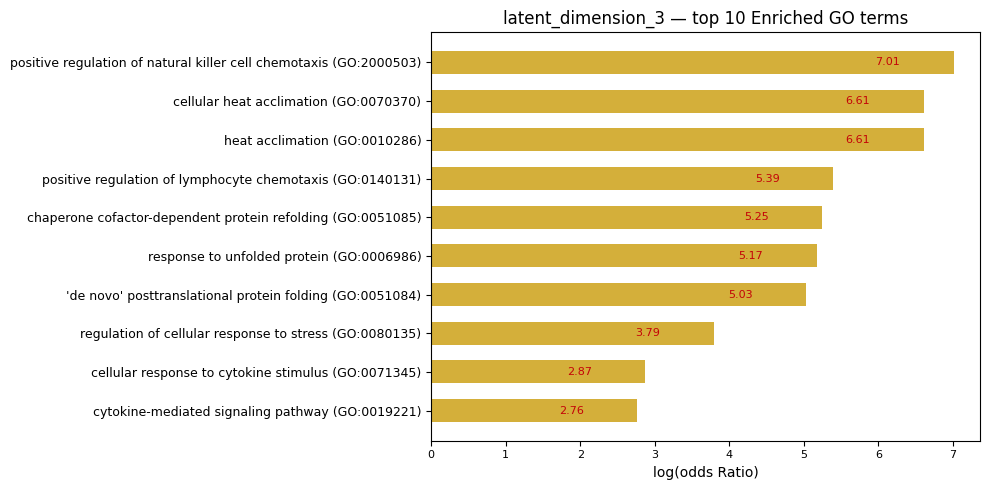

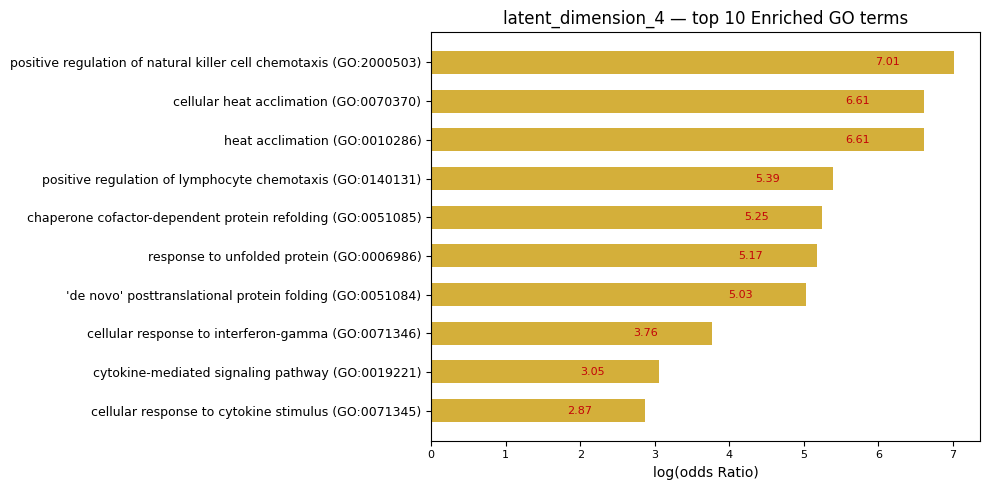

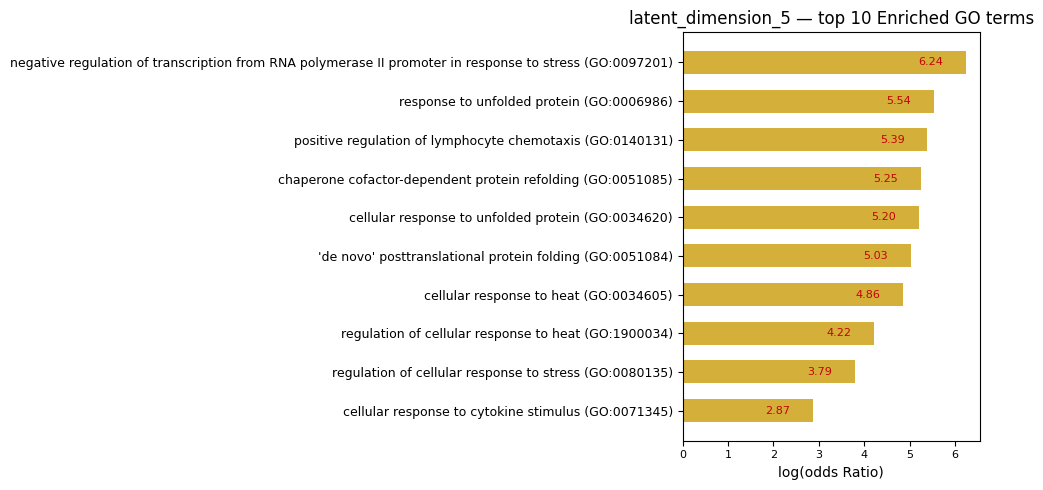

In [20]:
df_attributions_DLS =  ACXh.do_feature_importance_Varix(varix_model,
                                                method = 'DeepLiftShap',
                                                baseline_type = 'mean',
                                                baseline_group = 'all',
                                                obs_col = None,
                                                seed_int = 25,
                                                do_visualizations=True,                                                                 
                                               save_out_path = out_path_varix_DLS)

### IntegratedGradients

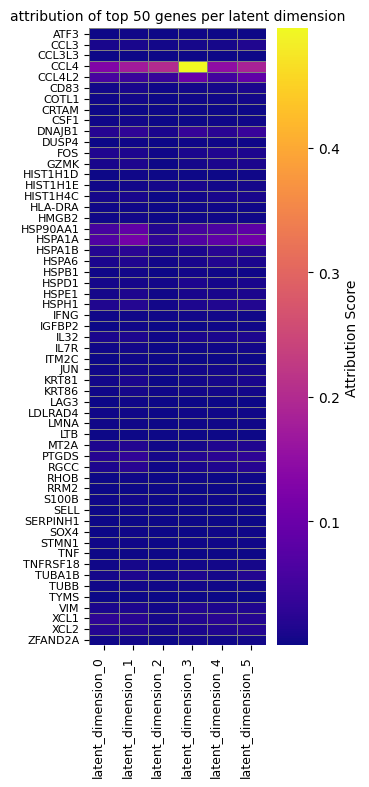

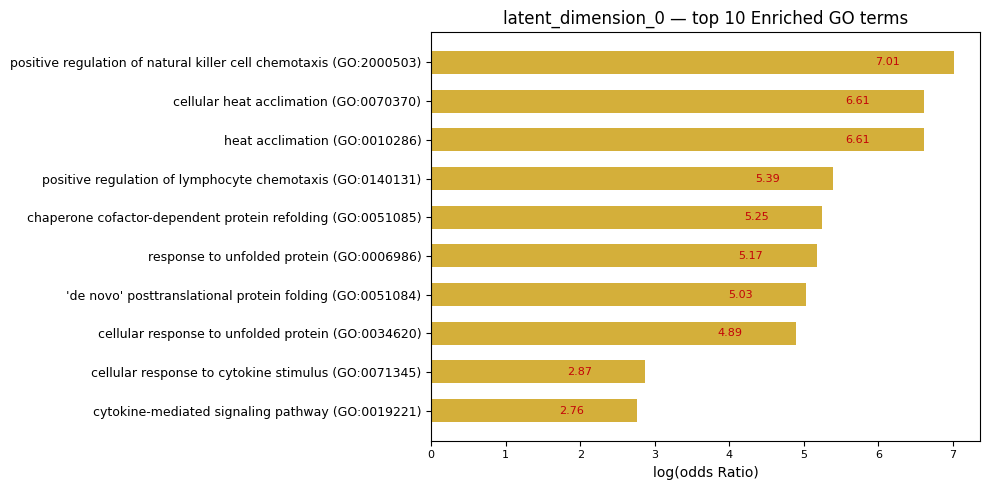

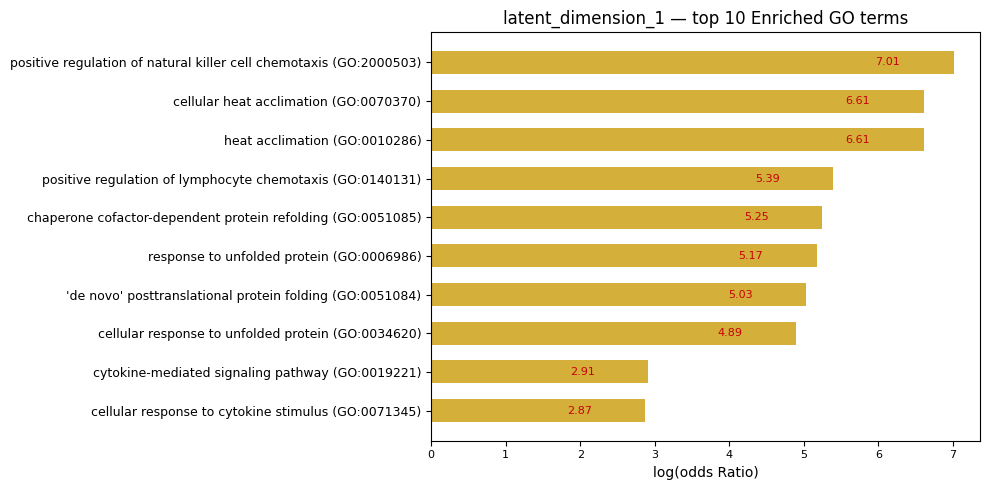

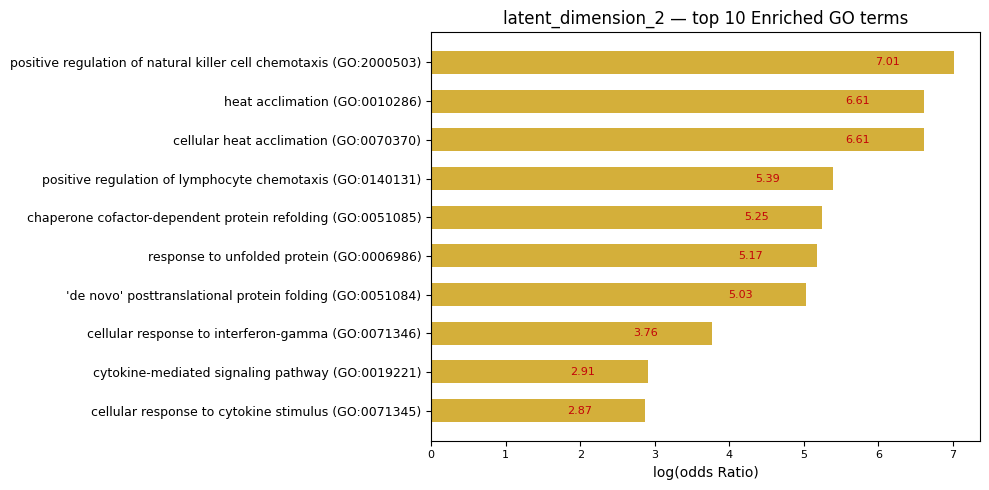

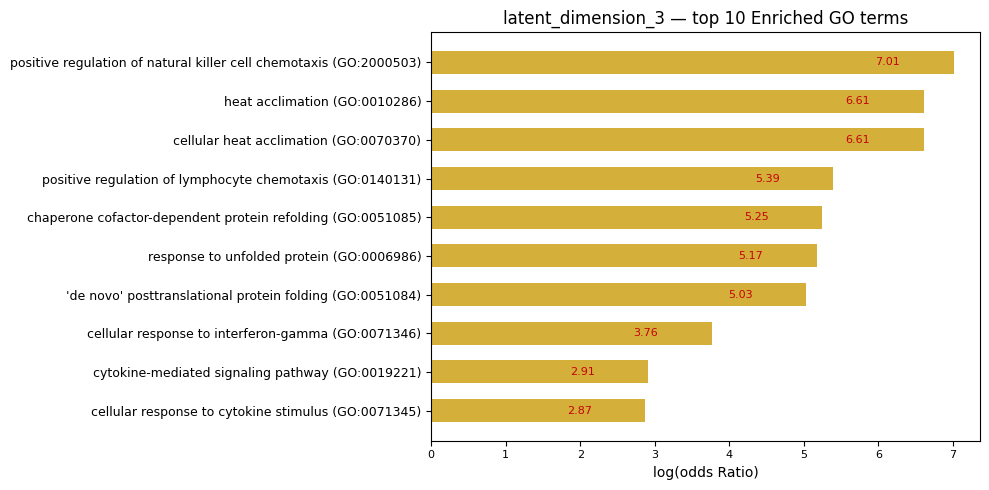

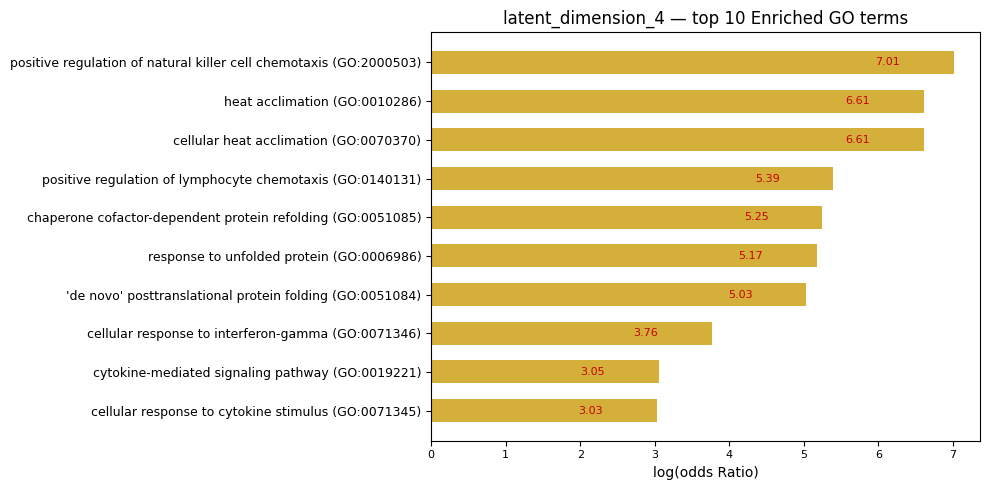

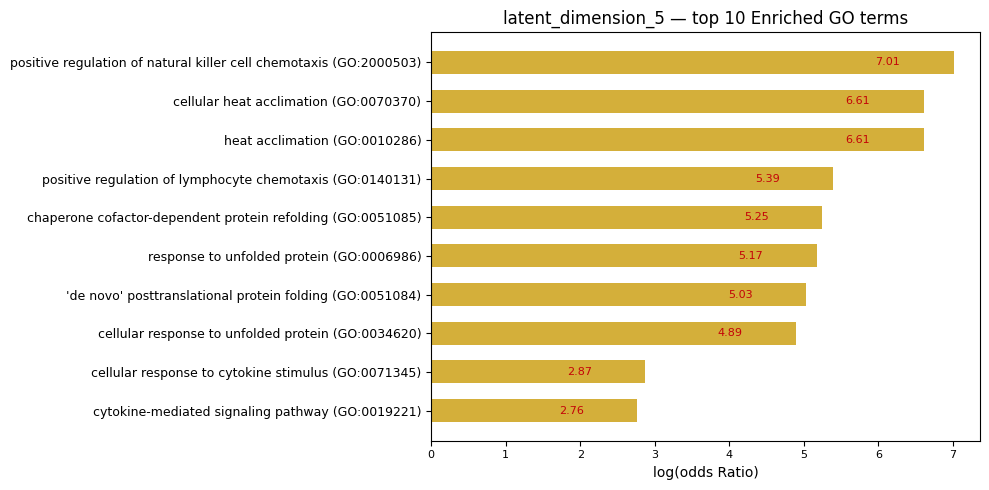

In [21]:
df_attributions_IG =  ACXh.do_feature_importance_Vanillix(vanillix_model,
                                                method = 'IntegratedGradients',
                                                baseline_type = 'mean',
                                                baseline_group = 'all',
                                                obs_col = None,
                                                seed_int = 25,
                                                do_visualizations=True,                                                                 
                                               save_out_path = out_path_vanillix_IG)

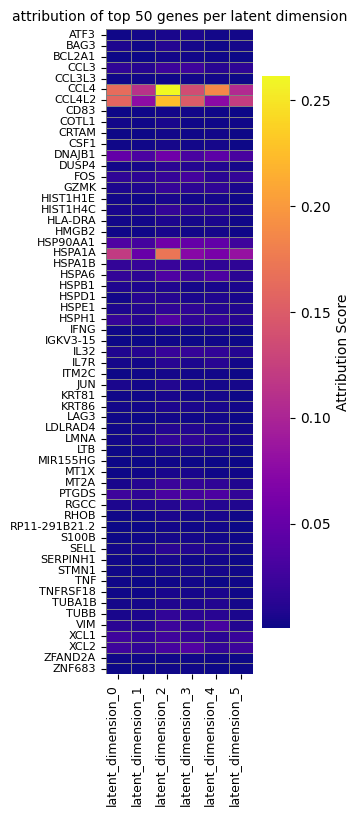

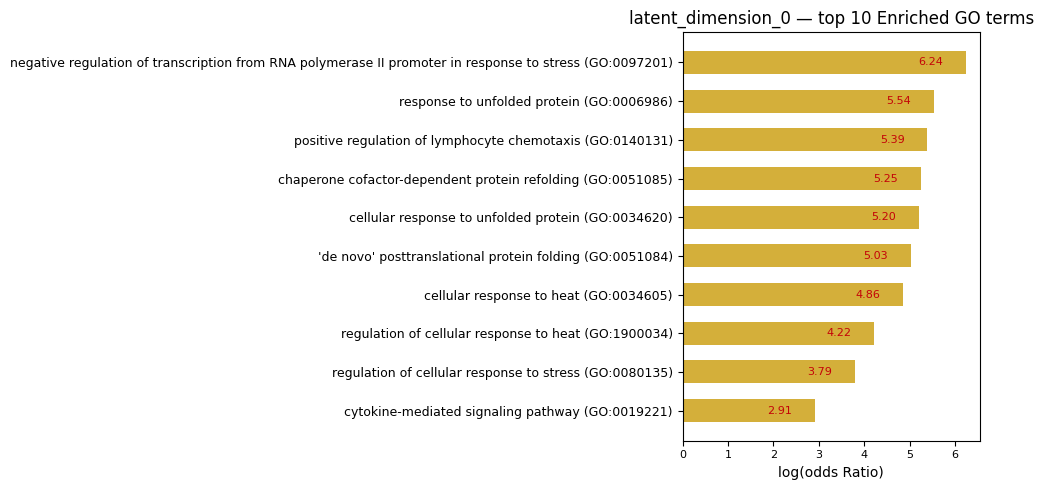

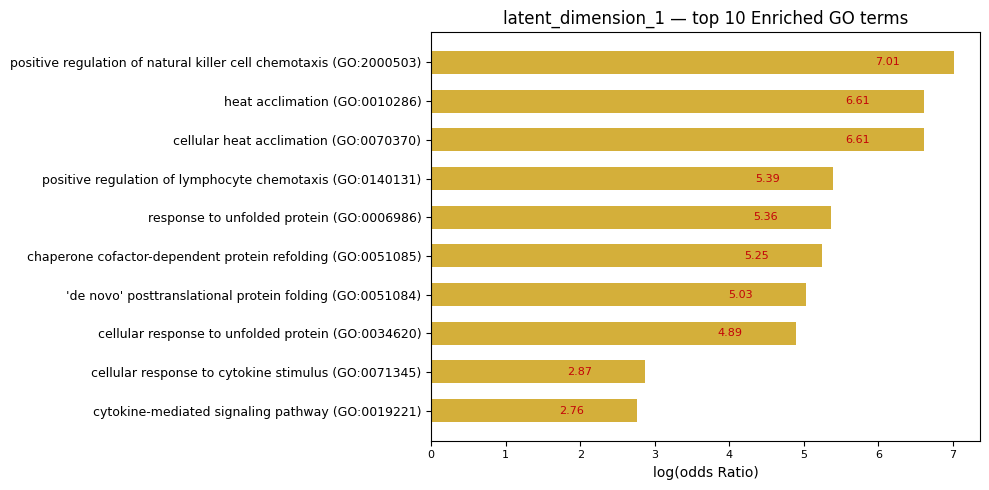

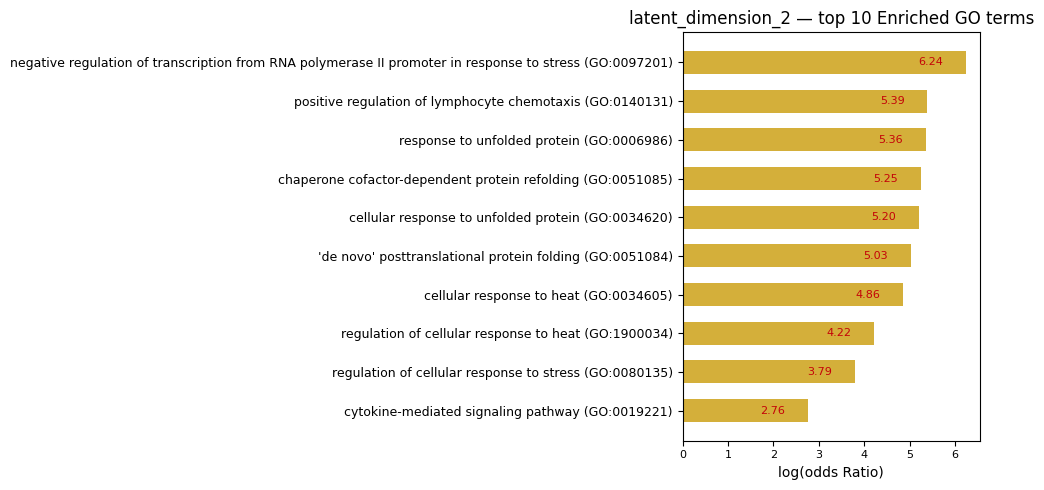

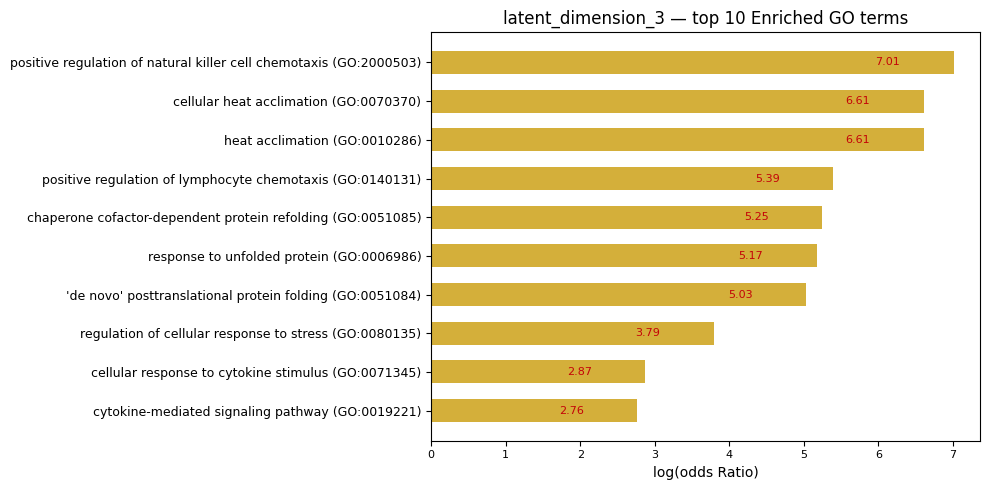

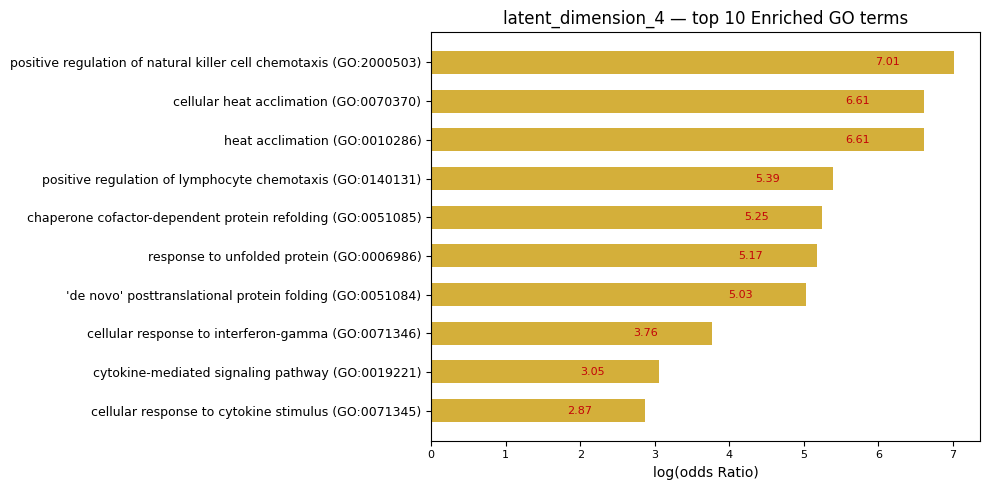

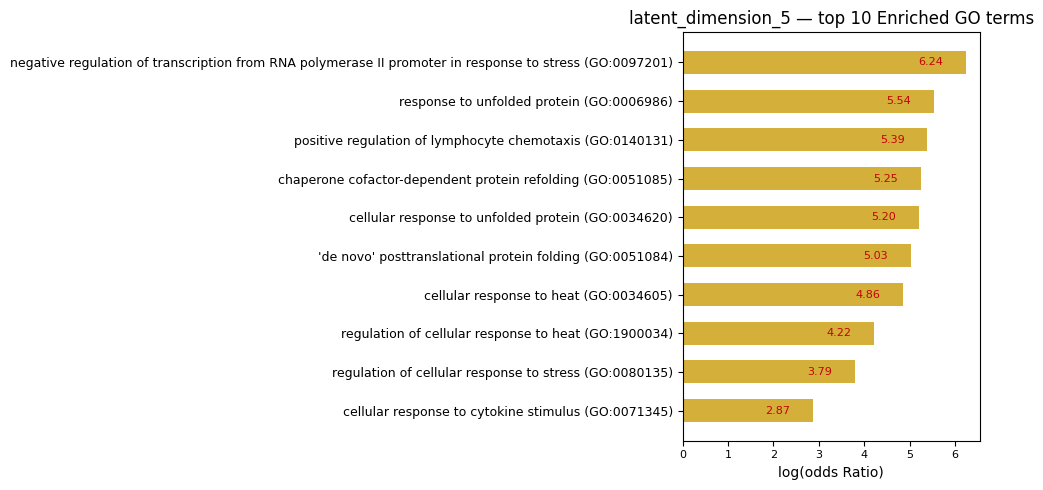

In [22]:
df_attributions_IG =  ACXh.do_feature_importance_Varix(varix_model,
                                                method = 'IntegratedGradients',
                                                baseline_type = 'mean',
                                                baseline_group = 'all',
                                                obs_col = None,
                                                seed_int = 25,
                                                do_visualizations=True,                                                                 
                                               save_out_path = out_path_varix_IG)

In [29]:
out_path_varix_model = os.path.join(out_path_varix,'model')

In [35]:
acx.Varix.load(os.path.join(out_path_varix_model,'varix.pkl'))

Attempting to load a pipeline from C:\Users\vfriedrich\projects\ACX_XAI\out\XAI_06\Varix\model\varix.pkl...


TypeError: cannot create weak reference to 'NoneType' object

In [ ]:
van2 = acx.Vanillix.load("van.pkl")